<a href="https://colab.research.google.com/github/olabukkie/Data_Analytics/blob/main/DA_Yellow_Assignment2_586297_Bukola_Olatunde_Oladipupo_ola_bukkie_yahoo_co_uk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Question 1: Data Visualization

**Part 1**: Data Exploration

1. Load the Titanic dataset into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


2. Explore the first few rows of the dataset to understand its structure.

In [3]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,8.0500,S


In [4]:
# data types for each column
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
Parch            int64
Fare           float64
Embarked        object
dtype: object

3. Calculate and visualise the basic statistics (mean, median, etc) for the numeric columns [1
correct numeric + 1].

In [7]:
# number of unique values

titanic["Pclass"].nunique()

3

In [8]:
# number of people who survived

titanic["Survived"].sum()

342

In [9]:
# total number of people on board

titanic["PassengerId"].count()

891

In [10]:
print(type(titanic.groupby('Sex').mean('Age')))
titanic.groupby('Sex').mean('Age')

<class 'pandas.core.frame.DataFrame'>


,PassengerId,Survived,Pclass,Age,Parch,Fare
Sex,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.235702,25.523893


In [11]:
titanic_class = titanic.groupby("Pclass")

In [12]:
for emb, titanic_df in titanic_class:
    print(emb)
    print(titanic_df)

1
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  Parch  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      0   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ..

In [13]:
# total number of people who survived per class
titanic_class.sum('Survived')

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,99705,136,7111.42,77,18177.4125
2,82056,87,5168.83,70,3801.8417
3,215625,119,8924.92,193,6714.6951


In [14]:
# average age of people from different classes
titanic_class.mean('Age')

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,461.597222,0.629630,38.233441,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.393075,13.675550


In [13]:
# median age of people from different classes
titanic_class.median('Age')

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,472.0,1.0,37.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,8.0500


In [15]:
# max ticket fare paid
titanic_class.max('Fare')

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,890,1,80.0,4,512.3292
2,887,1,70.0,3,73.5000
3,891,1,74.0,6,69.5500


In [16]:
# min ticket fare paid
titanic_class.min('Fare')

,PassengerId,Survived,Age,Parch,Fare
Pclass,,,,,
1,2,0,0.92,0,0.0
2,10,0,0.67,0,0.0
3,1,0,0.42,0,0.0


**Part 2**: Visualization

1. Create a bar chart to show the distribution of passengers by class (1st, 2nd, 3rd).

In [17]:
#MATPLOTLIB
import matplotlib.pyplot as plt
%matplotlib inline
#SEABORN
import seaborn as sns

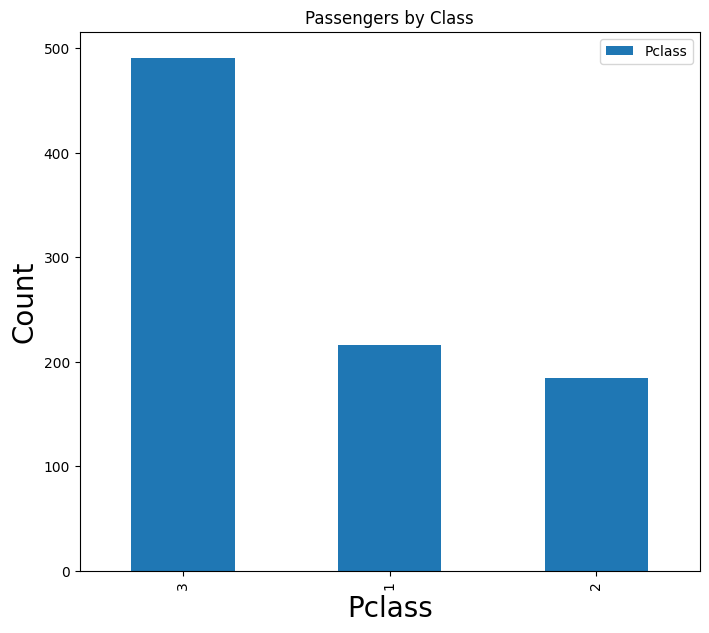

In [18]:
# bar chart showing the distribution of passengers by class

plt.figure(figsize=(8,7))
plt.title('Passengers by Class')
plt.xlabel('Pclass',fontsize=20)
plt.ylabel('Count',fontsize=20)
# Count the number of times each passenger class appears
Pclass_distribution = titanic['Pclass'].value_counts()
Pclass_distribution.plot(kind='bar')
plt.legend()
plt.show()

2. Create a histogram to visualise the age distribution of passengers.

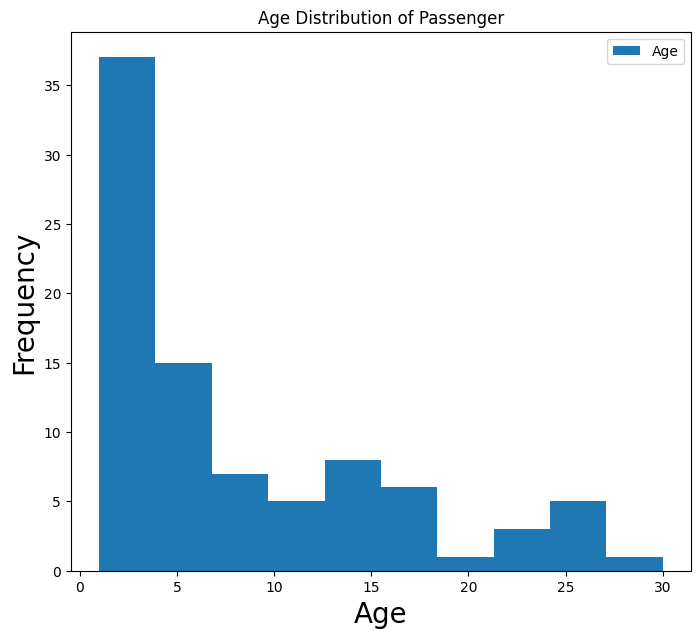

In [19]:
# histogram showing the age distribution of passengers

plt.figure(figsize=(8,7))
plt.title('Age Distribution of Passenger')
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
# Count the number of times each passenger appears
Age_distribution = titanic['Age'].value_counts()
Age_distribution.plot(kind='hist')
plt.legend()
plt.show()

3. Calculate and visualise the survival rate of passengers. Create a pie chart to
represent this information.

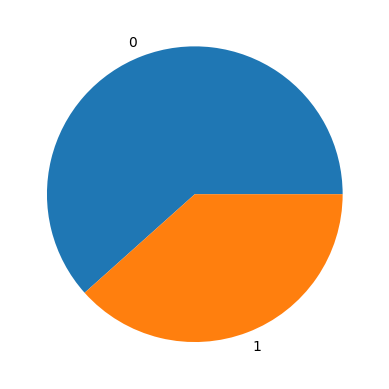

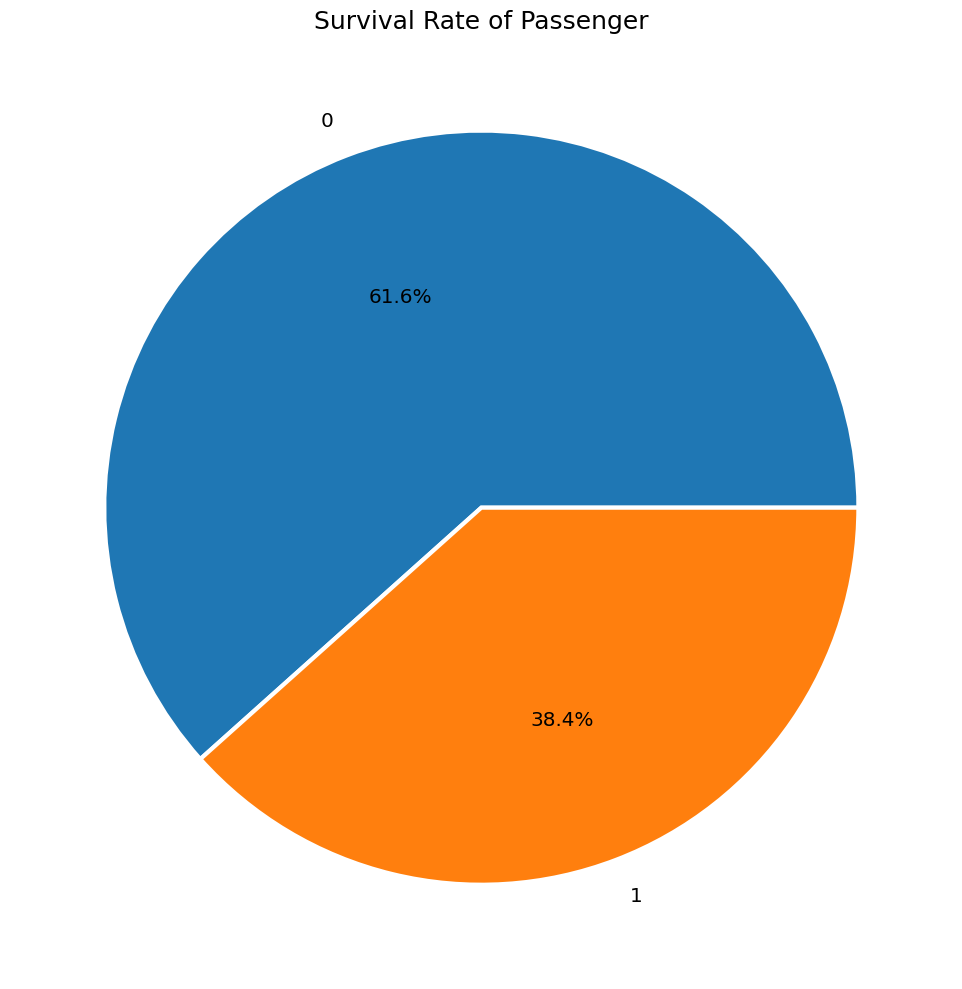

In [20]:
# pie chart
ser = titanic.groupby('Survived')['PassengerId'].count()
ser = ser.sort_values(ascending=False)
plt.pie(titanic['Survived'].value_counts(),labels= ser.index ,shadow=False)
# Making the pie bigger and more readable
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(titanic['Survived'].value_counts(),labels=ser.index, autopct='%.1f%%',
  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
  textprops={'size': 'x-large'})
ax.set_title('Survival Rate of Passenger', fontsize=18)
plt.tight_layout()

4. Create a bar chart to show the count of passengers by gender.

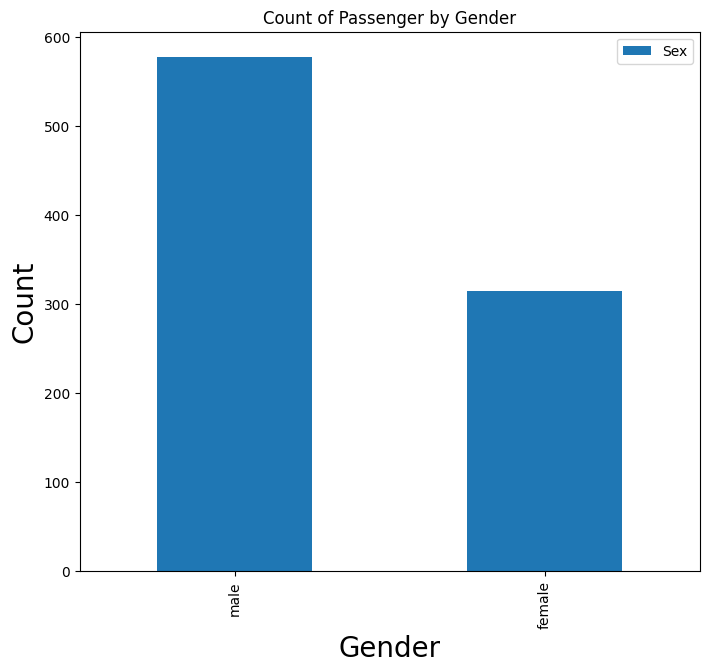

In [21]:
# bar chart showing the count of passengers by gender

plt.figure(figsize=(8,7))
plt.title('Count of Passenger by Gender')
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Count',fontsize=20)
# Count the number of passengers by gender
Gender_distribution = titanic['Sex'].value_counts()
Gender_distribution.plot(kind='bar')
plt.legend()
plt.show()

5. Create a stacked bar chart to visualise the survival rate by gender. Explain any
gender-based differences in survival.

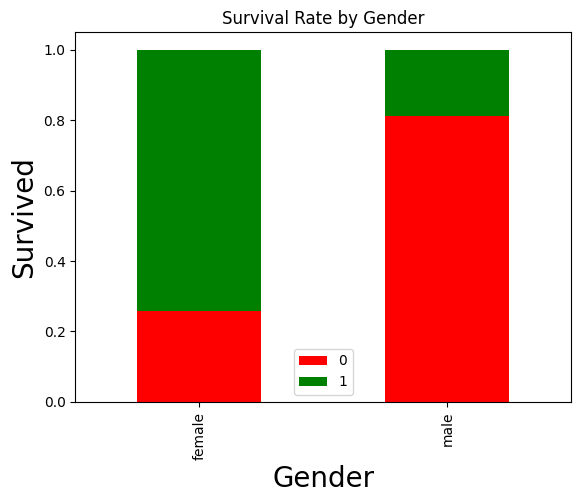

In [22]:
# stacked bar chart showing the survival rate by gender

# Group the data by gender and survival status and count the occurrences
survival_counts = titanic.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Calculate survival rates
survival_rates = survival_counts.div(survival_counts.sum(axis=1), axis=0)

survival_rates.plot(kind='bar', stacked=True, color=['red', 'green'])

# Customize the plot
plt.title('Survival Rate by Gender')
plt.xlabel('Gender',fontsize=20)
plt.ylabel('Survived',fontsize=20)
plt.legend()

plt.show()

**Explain any gender-based differences in survival**

In this code, we first group the data by gender and survival status to calculate the number of passengers in each category. Then, we calculate the survival rates by dividing the counts of survived passengers by the total counts for each gender.

The resulting stacked bar chart displays survival rates for males and females. There are significant differences in survival rates between the genders, the "Survived" category is higher for females than males, this suggests a gender-based difference in survival. It could be that the rescue team placed priority on evacuating females than males.

6. Create a count plot (bar chart) to show the number of passengers who embarked


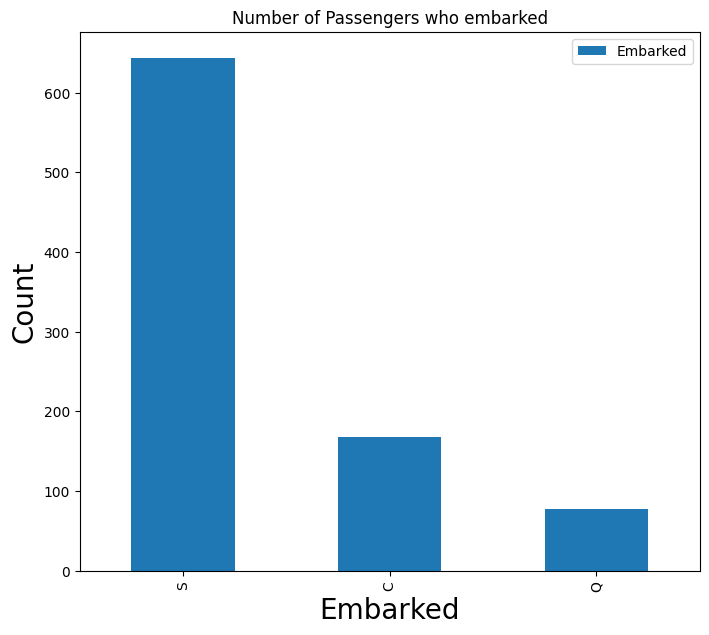

In [23]:
# bar chart showing the number of passengers who embarked

plt.figure(figsize=(8,7))
plt.title('Number of Passengers who embarked')
plt.xlabel('Embarked',fontsize=20)
plt.ylabel('Count',fontsize=20)
# Count the number of passengers who embarked
Embarked_passengers = titanic['Embarked'].value_counts()
Embarked_passengers.plot(kind='bar')
plt.legend()
plt.show()

**What do you notice about the embarkation points?**

There are three possible Embarkation points — S, C, and Q. Majority of the people boarded from S. A few boarded from C and the least number of passengers boarded from Q.

7. Create a box plot to visualise the distribution of family sizes among passengers.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f65647c61d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f65647c6710>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7f65647c5e40>],
 'medians': [<matplotlib.lines.Line2D at 0x7f65647c6c50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f65647c6ef0>],
 'means': []}

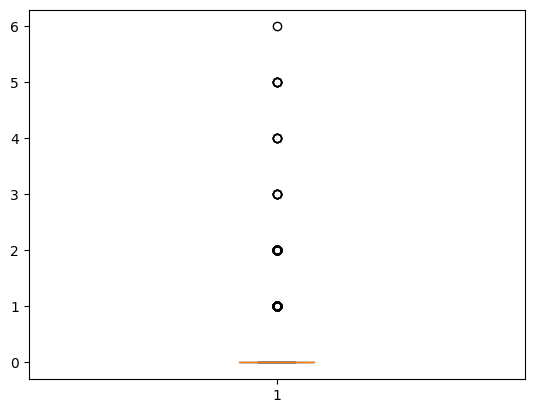

In [24]:
# box plot to show distribution of family sizes
plt.boxplot(titanic['Parch'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

In [31]:
dfParch=titanic.drop('Parch',axis=1)

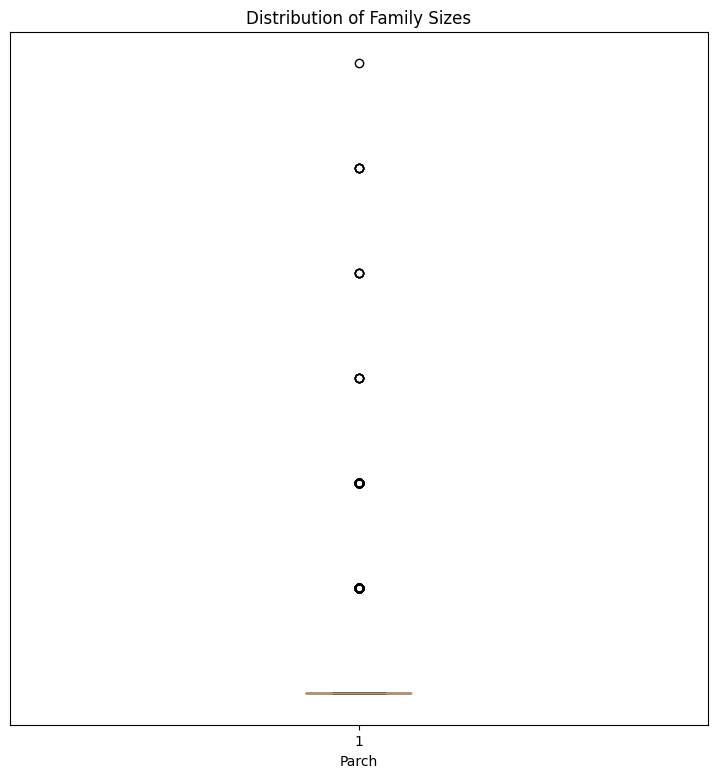

In [35]:
plt.figure(figsize=(9,9))
plt.boxplot(titanic['Parch'])
#Set Title
plt.title('Distribution of Family Sizes')
plt.xlabel('Parch')
plt.yticks([])  # Remove y-axis labels

plt.show()
#plt.boxplot(dfParch.values,labels=['PassengerId','Parch'])

8. Create a scatter plot to visualise the relationship between fare and age. Do
passengers who paid higher fares tend to be older?

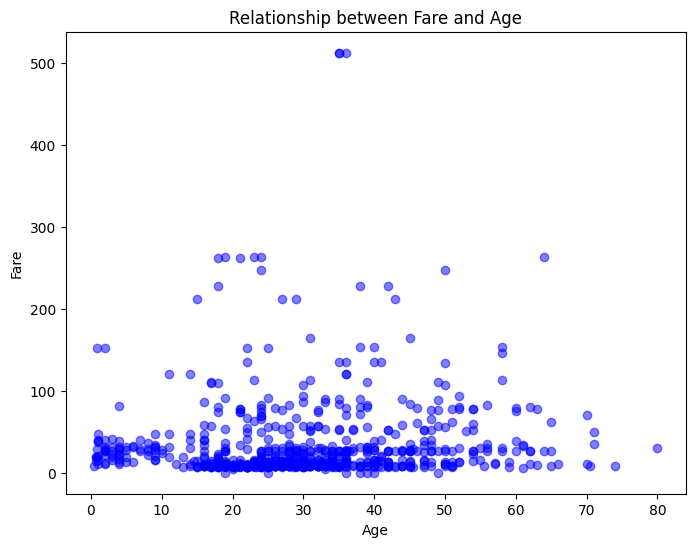

In [36]:
# scatter plot showing relationship between fare and age
plt.figure(figsize=(8, 6))
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5, color='b')

# Customize the plot
plt.title('Relationship between Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')

# Show the plot
plt.show()

<Axes: xlabel='Age', ylabel='Fare'>

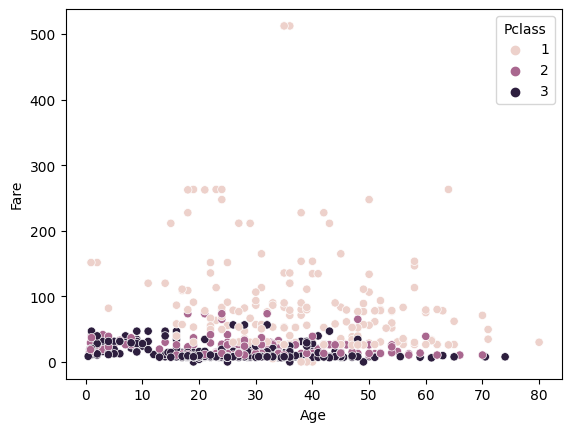

In [37]:
sns.scatterplot(x=titanic['Age'],y=titanic['Fare'],hue=titanic['Pclass'])

If there is a general trend of points moving from the lower left to the upper right, it suggests that passengers who paid higher fares tend to be older. But this is not the case, so passengers who pay higher fares are not necessarily older.

### Question 2: Sentiment Analysis

**Part 1**: Data Loading

1. Load the dataset Corona_NLP.csv

In [38]:
from google.colab import files
uploaded = files.upload()

Saving Corona_NLP.csv to Corona_NLP.csv


2. Show the last 10 rows of the dataframe

In [39]:
corona = pd.read_csv("Corona_NLP.csv")
corona.tail(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
44948,3789.0,48741,Pakistan,16-03-2020,You never eaten the pigs cat dog or food from ...,Neutral
44949,3790.0,48742,"California, USA",16-03-2020,@calebmealer @thebradfordfile @realDonaldTrump...,Extremely Positive
44950,3791.0,48743,"Cincinnati, Ohio",16-03-2020,"Even though the Law Library is closed, ALL sub...",Positive
44951,3792.0,48744,Washington D.C.,16-03-2020,"With Gov Hogan's announcement that all bars, r...",Extremely Negative
44952,3793.0,48745,Washington D.C.,16-03-2020,"@RicePolitics @MDCounties Craig, will you call...",Negative
44953,3794.0,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
44954,3795.0,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
44955,3796.0,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
44956,3797.0,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
44957,3798.0,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


**Part 2**: Manipulation and Visualisations

The independent attributes that convey information are:
1. Location
2. Time (TweetedAt)
3. Text (OriginalTweet)

It should be noted that although we will not be using the TweetedAt and Location columns in our
analysis, we will still conduct a minor exploratory data analysis (EDA) on these columns

1. Check if there are any duplicate rows. If there are any, remove the duplicates.

In [40]:
# Check for duplicate rows
duplicate_rows = corona[corona.duplicated()]

# Display duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(duplicate_rows)

    # Remove duplicate rows
    corona = corona.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

Duplicate rows found:
       UserName ScreenName Location TweetAt OriginalTweet Sentiment
39207       NaN    Neutral      NaN     NaN           NaN       NaN
Duplicate rows removed.


2. (a) In the Location column, find unique values and their corresponding frequencies
(number of times they appear)

In [41]:
location_counts = corona['Location'].value_counts()
# Display unique values and their frequencies
print(location_counts)


United States             603
London, England           568
London                    565
New York, NY              429
Washington, DC            411
                         ... 
New York State of Mind      1
Bury, England               1
Brent, London               1
Wall, NJ                    1
Haverford, PA               1
Name: Location, Length: 13127, dtype: int64


(b) Sort the values in descending order.

In [42]:
location_counts.sort_values(ascending=False)

United States             603
London, England           568
London                    565
New York, NY              429
Washington, DC            411
                         ... 
Newry and Mourne            1
Brenham, TX                 1
Baton Rouge, Louisiana      1
Grounded                    1
Haverford, PA               1
Name: Location, Length: 13127, dtype: int64

(c) Using a bar chart, visualise your results for the top 20 locations.

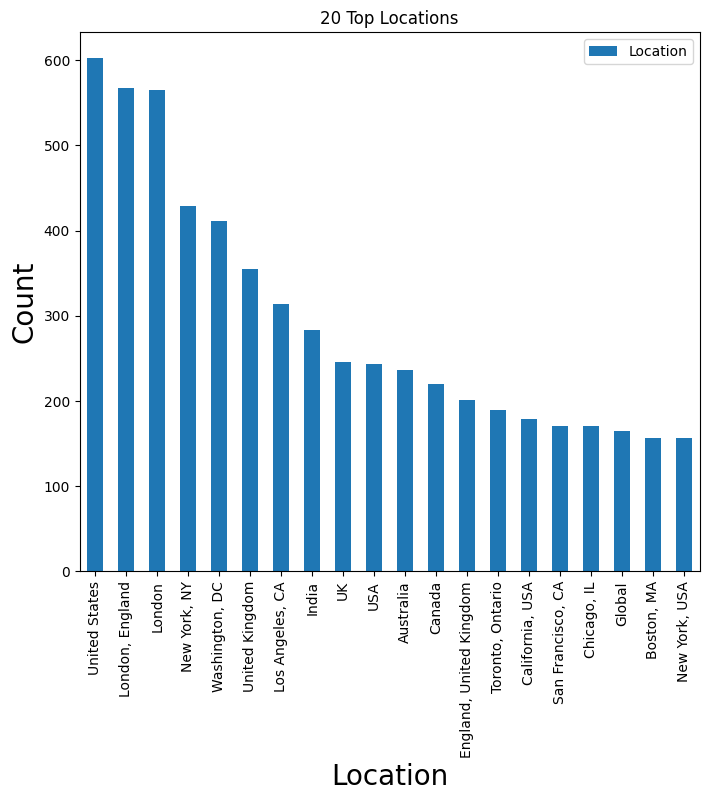

In [43]:
# Showing the top 20 locations in a bar chart
plt.figure(figsize=(8,7))
plt.title('20 Top Locations')
plt.xlabel('Location',fontsize=20)
plt.ylabel('Count',fontsize=20)

location_counts[:20].plot(kind='bar')
plt.legend()
plt.show()

3. You will see that Sentiment can take 5 values: "Extremely Negative", "Negative",
"Neutral", "Positive", "Extremely Positive". Using an appropriate color palette and an
appropriate type of graph, visualise how Sentiment is distributed.

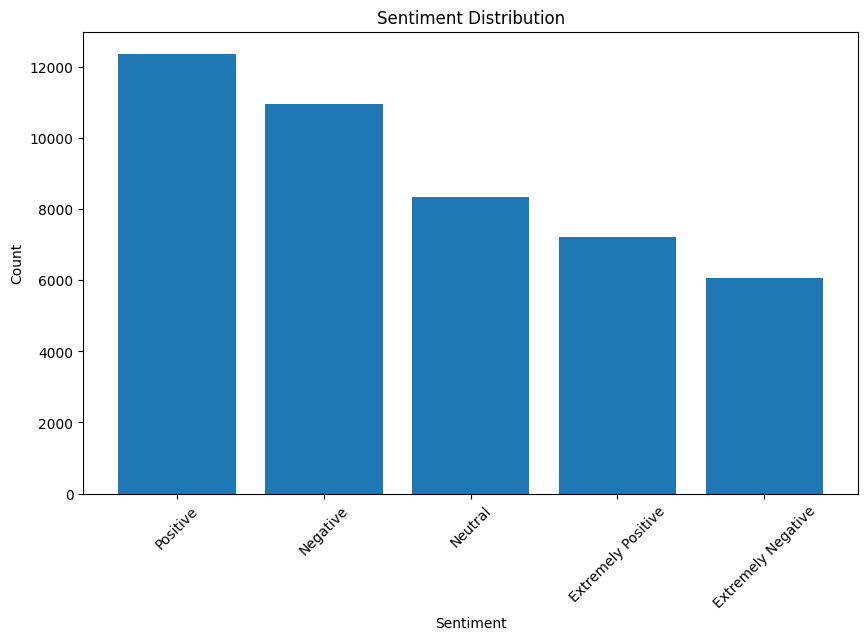

In [44]:

# Count the number of values for each sentiment
sentiment_counts = corona['Sentiment'].value_counts()

# Define an appropriate color palette
colors = sns.color_palette("coolwarm", n_colors=len(sentiment_counts))

plt.figure(figsize=(10, 6))
#sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, data=sentiment_counts, palette=colors)

# Create a bar chart of sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values)

# Customize the plot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


4. Change the labels of part of the data, combining "Extremely Negative" and "Negative"
into “Negative” and "Positive" and "Extremely Positive" into positive.

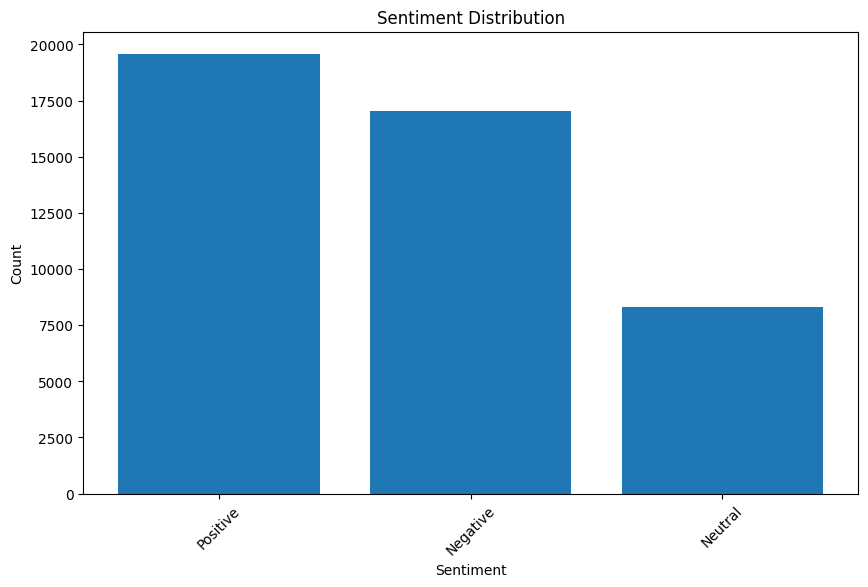

In [45]:
# Combine sentiment labels
corona['Sentiment'].replace({"Extremely Negative": "Negative", "Extremely Positive": "Positive"}, inplace=True)
sentiment_replaced = corona['Sentiment'].value_counts()
# Define an appropriate color palette
colors = sns.color_palette("coolwarm", n_colors=len(sentiment_counts))

# Create a bar plot
plt.figure(figsize=(10, 6))
#sns.barplot(x=sentiment_replaced.index, y=sentiment_replaced.values, data=sentiment_replaced, palette=colors)
plt.bar(sentiment_replaced.index, sentiment_replaced.values)
# Customize the plot
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

**Part 3**: Cleaning

Perform the following text cleaning steps. I suggest that you do subparts 1, 2 and 3 in the same
function:
1. Remove hyperlinks
2. Remove hashtags
3. Replace \n and \r with an empty space

In [46]:
import re



In [47]:
original_tweet = corona['OriginalTweet'].value_counts
print(original_tweet)

<bound method IndexOpsMixin.value_counts of 0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
44953    Meanwhile In A Supermarket in Israel -- People...
44954    Did you panic buy a lot of non-perishable item...
44955    Asst Prof of Economics @cconces was on @NBCPhi...
44956    Gov need to do somethings instead of biar je r...
44957    I and @ForestandPaper members are committed to...
Name: OriginalTweet, Length: 44957, dtype: object>


In [48]:
# Remove hyperlinks (URLs)
original_tweet = re.sub("https?:\/\/[a-z0-9-]+(?:\.[a-z0-9-]+)+[/?#]\S*", "", str(original_tweet))

# Remove hashtags
original_tweet = re.sub("#", "", original_tweet)

# Replace '\n' and '\r' with a space
original_tweet = original_tweet.replace('\n', ' ').replace('\r', ' ')

print(original_tweet)

<bound method IndexOpsMixin.value_counts of 0        @MeNyrbie @Phil_Gahan @Chrisitv  1        advice Talk to your neighbours family to excha... 2        Coronavirus Australia: Woolworths to give elde... 3        My food stock is not the only one which is emp... 4        Me, ready to go at supermarket during the COV...                                ...                         44953    Meanwhile In A Supermarket in Israel -- People... 44954    Did you panic buy a lot of non-perishable item... 44955    Asst Prof of Economics @cconces was on @NBCPhi... 44956    Gov need to do somethings instead of biar je r... 44957    I and @ForestandPaper members are committed to... Name: OriginalTweet, Length: 44957, dtype: object>


4. Using TweetTokenizer in nltk.tokenize, perform tokenization. Sample code is provided.
You can use another function if you wish.

In [49]:
import nltk
from nltk.stem import WordNetLemmatizer

In [50]:
# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the data to be lemmatized
import string

# Tokenize: Split the sentence into words
import nltk
nltk.download('punkt')

word_list = nltk.word_tokenize(str(original_tweet))
print(word_list)


# Lemmatize list of words and join
import nltk
nltk.download('wordnet')
lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
print(lemmatized_output)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['<', 'bound', 'method', 'IndexOpsMixin.value_counts', 'of', '0', '@', 'MeNyrbie', '@', 'Phil_Gahan', '@', 'Chrisitv', '1', 'advice', 'Talk', 'to', 'your', 'neighbours', 'family', 'to', 'excha', '...', '2', 'Coronavirus', 'Australia', ':', 'Woolworths', 'to', 'give', 'elde', '...', '3', 'My', 'food', 'stock', 'is', 'not', 'the', 'only', 'one', 'which', 'is', 'emp', '...', '4', 'Me', ',', 'ready', 'to', 'go', 'at', 'supermarket', 'during', 'the', 'COV', '...', '...', '44953', 'Meanwhile', 'In', 'A', 'Supermarket', 'in', 'Israel', '--', 'People', '...', '44954', 'Did', 'you', 'panic', 'buy', 'a', 'lot', 'of', 'non-perishable', 'item', '...', '44955', 'Asst', 'Prof', 'of', 'Economics', '@', 'cconces', 'was', 'on', '@', 'NBCPhi', '...', '44956', 'Gov', 'need', 'to', 'do', 'somethings', 'instead', 'of', 'biar', 'je', 'r', '...', '44957', 'I', 'and', '@', 'ForestandPaper', 'members', 'are', 'committed', 'to', '...', 'Name', ':', 'OriginalTweet', ',', 'Length', ':', '44957', ',', 'dtype', ':'

[nltk_data] Downloading package wordnet to /root/nltk_data...


< bound method IndexOpsMixin.value_counts of 0 @ MeNyrbie @ Phil_Gahan @ Chrisitv 1 advice Talk to your neighbour family to excha ... 2 Coronavirus Australia : Woolworths to give elde ... 3 My food stock is not the only one which is emp ... 4 Me , ready to go at supermarket during the COV ... ... 44953 Meanwhile In A Supermarket in Israel -- People ... 44954 Did you panic buy a lot of non-perishable item ... 44955 Asst Prof of Economics @ cconces wa on @ NBCPhi ... 44956 Gov need to do somethings instead of biar je r ... 44957 I and @ ForestandPaper member are committed to ... Name : OriginalTweet , Length : 44957 , dtype : object >


5. In the same function, remove stopwords and punctuation signs.

In [51]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

# removing stopwords
clean_tweets = " ".join([word for word in original_tweet.split() if word not in stop_words])

# removing punctuation
import string
clean_tweets = original_tweet.translate(str.maketrans('', '', string.punctuation))
print(clean_tweets)

bound method IndexOpsMixinvaluecounts of 0        MeNyrbie PhilGahan Chrisitv  1        advice Talk to your neighbours family to excha 2        Coronavirus Australia Woolworths to give elde 3        My food stock is not the only one which is emp 4        Me ready to go at supermarket during the COV                                                         44953    Meanwhile In A Supermarket in Israel  People 44954    Did you panic buy a lot of nonperishable item 44955    Asst Prof of Economics cconces was on NBCPhi 44956    Gov need to do somethings instead of biar je r 44957    I and ForestandPaper members are committed to Name OriginalTweet Length 44957 dtype object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


6. Perform stemming using PorterStemmer in nltk.stem

In [52]:
from nltk.stem import PorterStemmer
# Download NLTK data
nltk.download('punkt')

# Create a PorterStemmer object
stemmer = PorterStemmer()

# Tokenize the text into words
words = nltk.word_tokenize(clean_tweets)

# Stem each word in the list
stemmed_words = [stemmer.stem(word) for word in words]

# Join the stemmed words back into a sentence
stemmed_text = " ".join(stemmed_words)

# Print the stemmed text
print(stemmed_text)

bound method indexopsmixinvaluecount of 0 menyrbi philgahan chrisitv 1 advic talk to your neighbour famili to excha 2 coronaviru australia woolworth to give eld 3 my food stock is not the onli one which is emp 4 me readi to go at supermarket dure the cov 44953 meanwhil in a supermarket in israel peopl 44954 did you panic buy a lot of nonperish item 44955 asst prof of econom cconc wa on nbcphi 44956 gov need to do someth instead of biar je r 44957 i and forestandpap member are commit to name originaltweet length 44957 dtype object


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


7. Apply these functions to the dataset and visualise the first 5 rows.

In [53]:
# Apply the clean_text function to the column
#corona['OriginalTweet'] = corona['OriginalTweet'].apply(clean_tweets)

# Visualize the first 5 rows of the DataFrame
print(corona.head())

   UserName ScreenName   Location     TweetAt  \
0    3799.0      48751     London  16-03-2020   
1    3800.0      48752         UK  16-03-2020   
2    3801.0      48753  Vagabonds  16-03-2020   
3    3802.0      48754        NaN  16-03-2020   
4    3803.0      48755        NaN  16-03-2020   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive  
3  My food stock is not the only one which is emp...  Positive  
4  Me, ready to go at supermarket during the #COV...  Negative  


**Part 4**: Model development

1. Create a tf-idf vectorizer and fit the function.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer to the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(corona)

# Convert the TF-IDF matrix to a DataFrame (for better visualization)
import pandas as pd
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df)


   location  originaltweet  screenname  sentiment  tweetat  username
0       0.0            0.0         0.0        0.0      0.0       1.0
1       0.0            0.0         1.0        0.0      0.0       0.0
2       1.0            0.0         0.0        0.0      0.0       0.0
3       0.0            0.0         0.0        0.0      1.0       0.0
4       0.0            1.0         0.0        0.0      0.0       0.0
5       0.0            0.0         0.0        1.0      0.0       0.0


2. Keeping only the columns Tweet and Sentiment, split your dataset into training (80%)
and test (20%) sets.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Split the dataset into training (80%) and test (20%) sets
X = corona["OriginalTweet"]  # Features (Tweet column)
y = corona["Sentiment"]  # Target variable (Sentiment column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35965,)
X_test shape: (8992,)
y_train shape: (35965,)
y_test shape: (8992,)


3. Build a logistic regression model and fit the data.

In [94]:
pip install scikit-learn

In [95]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [115]:
# Data with 'OriginalTweet' and 'Sentiment' columns

X = corona['OriginalTweet']
y = corona['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)
y_train.fillna('', inplace=True)
y_test.fillna('', inplace=True)

# Create a TF-IDF vectorizer and fit it to the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf)
print(X_test_tfidf)

  (0, 16933)	0.14066676934290762
  (0, 15427)	0.3128512154831724
  (0, 30755)	0.13278811160572324
  (0, 27954)	0.1335616373012997
  (0, 62719)	0.2916600485191421
  (0, 38149)	0.17622146053547286
  (0, 19687)	0.20913343408680313
  (0, 63452)	0.05175427838787522
  (0, 47185)	0.11504089649992331
  (0, 57039)	0.2298264105312748
  (0, 9903)	0.15189980990769889
  (0, 62891)	0.11724228267029534
  (0, 7864)	0.08337894313049277
  (0, 27236)	0.25649700706132933
  (0, 50845)	0.22827475914033177
  (0, 50900)	0.2349629833693485
  (0, 23480)	0.1566064470770183
  (0, 7873)	0.246290279363748
  (0, 62549)	0.09971530740710896
  (0, 22641)	0.16661754625237207
  (0, 68167)	0.20463811636314466
  (0, 7238)	0.12427335274618248
  (0, 61844)	0.22951030609032233
  (0, 46892)	0.11599916448867151
  (0, 2925)	0.19797833732011846
  :	:
  (35963, 68488)	0.09217721191919787
  (35963, 45241)	0.10908101643364966
  (35963, 54026)	0.12990284710392366
  (35963, 8319)	0.08274332761632737
  (35963, 32529)	0.0603196133338041

In [116]:
# Create a logistic regression model
logistic_regression_model = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model to the training data
logistic_regression_model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000, random_state=42)

4. What is the accuracy of the model?

In [117]:
from sklearn.metrics import accuracy_score


In [118]:
y_pred = logistic_regression_model.predict(X_test_tfidf)


In [119]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2%}")


Accuracy of the model: 80.10%


5. Generate a classification report.

In [120]:
from sklearn.metrics import classification_report


In [121]:
y_pred = logistic_regression_model.predict(X_test_tfidf)


In [122]:
class_report = classification_report(y_test, y_pred)
print(class_report)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
    Negative       0.79      0.83      0.81      3337
     Neutral       0.78      0.60      0.68      1656
    Positive       0.82      0.86      0.84      3998

    accuracy                           0.80      8992
   macro avg       0.60      0.57      0.58      8992
weighted avg       0.80      0.80      0.80      8992



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6. BONUS: Comment on the metrics.

A classification report provides various metrics that help assess the performance of a classification model, such as a logistic regression model. The most commonly reported metrics in a classification report are precision, recall, F1-score, and support. Here's what each metric represents:

Precision: Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). It measures how many of the positive predictions were correct. A higher precision indicates a lower rate of false positives.

Recall (Sensitivity or True Positive Rate): Recall is the ratio of true positive predictions to the total number of actual positives in the dataset. It measures how many of the actual positive instances were correctly predicted. A higher recall indicates a lower rate of false negatives.

F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates a good balance between false positives and false negatives.

Support: Support represents the number of occurrences of each class in the test dataset. It provides context for interpreting the precision, recall, and F1-score metrics. Classes with lower support might have less reliable metrics.

Here's how to interpret the metrics:

If precision is high, it means that the model makes few false positive errors.
If recall is high, it means that the model makes few false negative errors.
A high F1-score indicates a good balance between precision and recall.
Support helps understand the sample size for each class, and should be considered when interpreting precision, recall, and F1-score.

### Question 3: Statistics
**Dataset**: q3_data.csv

1. What is the mean, mode, median and interquartile range for x1 and x2?

In [85]:
from google.colab import files
uploaded = files.upload()

Saving q3_data.csv to q3_data (1).csv


In [86]:
statistics = pd.read_csv("q3_data.csv")
statistics.head()

,x1,x2
0,27.440675,58.350216
1,35.759468,70.721069
2,30.138169,59.607830
3,27.244159,59.877037
4,21.182740,36.731351


In [87]:
import numpy as np
from scipy import stats


In [88]:
# Data for x1 and x2
x1 = np.array(statistics['x1'])
x2 = np.array(statistics['x2'])

# Calculate mean, mode, median, and IQR for x1
mean_x1 = np.mean(x1)
mode_x1 = stats.mode(x1)
median_x1 = np.median(x1)
q75, q25 = np.percentile(x1, [75 ,25])
iqr_x1 = q75 - q25

# Calculate mean, mode, median, and IQR for x2
mean_x2 = np.mean(x2)
mode_x2 = stats.mode(x2)
median_x2 = np.median(x2)
q75, q25 = np.percentile(x2, [75 ,25])
iqr_x2 = q75 - q25

# Print the results
print("x1 Mean:", mean_x1)
print("x1 Mode:", mode_x1)
print("x1 Median:", median_x1)
print("x1 Interquartile Range (IQR):", iqr_x1)
print("\nx2 Mean:", mean_x2)
print("x2 Mode:", mode_x2)
print("x2 Median:", median_x2)
print("x2 Interquartile Range (IQR):", iqr_x2)


x1 Mean: 49.790812994760515
x1 Mode: ModeResult(mode=0.2347738096273532, count=1)
x1 Median: 50.25686162982244
x1 Interquartile Range (IQR): 45.9107590452148

x2 Mean: -50.17388733310123
x2 Mode: ModeResult(mode=-210.0894328298957, count=1)
x2 Median: -50.357779095568446
x2 Interquartile Range (IQR): 201.3400268403476


2. What is the correlation coefficient between x1 and x2?

In [89]:
# Calculate the correlation coefficient between x1 and x2
correlation_coefficient = np.corrcoef(x1, x2)[0, 1]

print("Correlation Coefficient between x1 and x2:", correlation_coefficient)


Correlation Coefficient between x1 and x2: -0.8318445482811824


3. Fit a regression line and visualise the data points

In [90]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


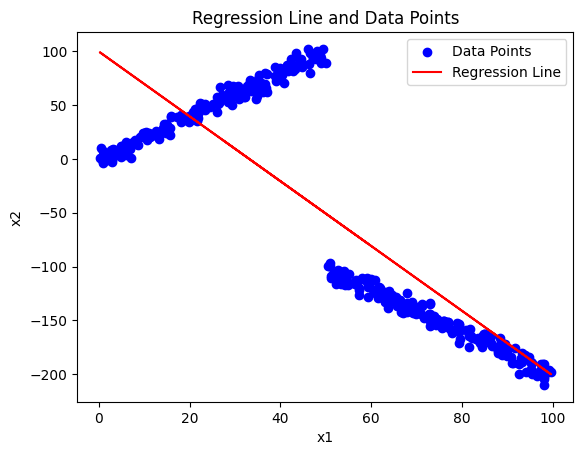

In [91]:
# Fit a linear regression model
regressor = LinearRegression()
regressor.fit(x1.reshape(-1, 1), x2)

# Predict x2 values based on the regression line
x2_pred = regressor.predict(x1.reshape(-1, 1))

# Visualize the data points and regression line
plt.scatter(x1, x2, label="Data Points", color='b')
plt.plot(x1, x2_pred, label="Regression Line", color='r')
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Regression Line and Data Points")
plt.show()


4. Comment on the correlation coefficient, the regression line and your scatter plot.

**Correlation Coefficient:**

The correlation coefficient ranges from -1 to 1, where -1 indicates a perfect negative correlation, 1 indicates a perfect positive correlation, and 0 indicates no correlation.

A correlation coefficient of -0.8318 is a negative value, and it falls within the range of -1 to 1, where:

A value of -1 represents a perfect negative correlation, meaning that as one variable increases, the other decreases in a perfectly linear fashion.
A value of 1 represents a perfect positive correlation, indicating that as one variable increases, the other also increases in a perfectly linear fashion.
A value of 0 suggests no linear correlation between the two variables.

In this case, the correlation coefficient of -0.8318 indicates a strong negative correlation between the two variables being analyzed. This means that as x1 increases, x2 tends to decrease in a strong and consistent linear manner.

**Regression Line:**

The regression line is a line that best fits the data points and is used to model the relationship between the two variables.

It's represented by the equation of a straight line: y = mx + b, where y is the predicted value of x2, m is the slope of the line (related to the correlation coefficient), x is the value of x1, and b is the y-intercept.

The fitted regression line represents the relationship between x1 and x2, where x1 is the independent variable, and x2 is the dependent variable. The line aims to minimize the error between predicted and actual x2 values.

**Scatter Plot:**

The scatter plot shows the individual data points for x1 and x2.
Each data point on the plot represents a pair of values for x1 and x2.
The blue data points are the actual data, and the red line represents the fitted regression line.

The scatter plot provides a visual representation of the data distribution and the relationship between x1 and x2. It helps you observe the trend and the extent to which the regression line fits the data.

In summary, the negative correlation coefficient and the downward-sloping regression line indicate that there is a negative linear relationship between x1 and x2, where an increase in x1 tends to correspond to a decrease in x2. The scatter plot visually confirms this relationship, showing how the data points are distributed relative to the regression line.